In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import time
import warnings
warnings.filterwarnings('ignore')
sns.set()
pal = sns.hls_palette(10, h=.5)
sns.set_palette(pal)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
#Source: http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml 
#direct source: !curl -O https://s3.amazonaws.com/nyc-tlc/misc/uber_nyc_data.csv
import wget 
url = "https://s3.amazonaws.com/nyc-tlc/misc/uber_nyc_data.csv"
filename = wget.download(url)
filename

100% [....................................................................] 1473327561 / 1473327561

'uber_nyc_data.csv'

In [3]:
df_uber=pd.read_csv(r"C:\Users\HP\Machine Learning Projects\uber_nyc_data.csv")

In [4]:
df_uber

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,2014-09-01 09:00:00,4.2500,0:15:11
1,252582,7B,15,2014-09-01 18:00:00,10.1700,0:34:05
2,252583,11,2A,2014-09-01 17:00:00,4.0200,0:17:06
3,252584,3B,4A,2014-09-01 13:00:00,1.4600,0:06:32
4,252585,2A,10,2014-09-01 14:00:00,8.3100,0:26:17
...,...,...,...,...,...,...
30925733,30693431,15,15,2015-09-01 00:00:00,6.8600,0:27:37
30925734,30693447,5B,2A,2015-09-01 00:00:00,3.4400,0:11:07
30925735,30693461,4C,NaN,2015-09-01 00:00:00,6.1700,0:19:10
30925736,30693466,2A,5A,2015-09-01 00:00:00,1.8700,0:07:54


In [5]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   origin_taz       object 
 2   destination_taz  object 
 3   pickup_datetime  object 
 4   trip_distance    float64
 5   trip_duration    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ GB


# Check for missing or possibly erroneous data.

In [6]:
df_uber.isnull().sum()

id                       0
origin_taz               0
destination_taz    1273023
pickup_datetime          0
trip_distance           38
trip_duration           38
dtype: int64

In [7]:
#To check for the duplicated rows
len(df_uber[df_uber.duplicated() == True])

0

In [8]:
arr1= df_uber.origin_taz.unique()
arr1

array(['7C', '7B', '11', '3B', '2A', '5B', '10', '2B', '9', '6B', '15',
       '4C', '5A', '8', '14', '4A', '7A', '1', '16', '3A', '2C', '6A',
       '12', '13', '3C', '4B', '5C', '17'], dtype=object)

In [9]:
arr2= df_uber.destination_taz.unique()
arr2

array(['6A', '15', '2A', '4A', '10', '4C', '7A', '3C', '5B', '14', '8',
       nan, '7C', '12', '2C', '1', '6B', '5C', '9', '3A', '2B', '11',
       '7B', '5A', '13', '4B', '18', '16', '3B', '17'], dtype=object)

In [10]:
set(arr2)-set(arr1)

{'18', nan}

In [11]:
df_uber[df_uber.destination_taz.isnull()].head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
15,252596,6B,NaN,2014-09-01 17:00:00,11.6700,0:23:45
32,252613,9,NaN,2014-09-01 16:00:00,80.6900,1:59:37
63,252644,9,NaN,2014-09-01 18:00:00,23.0700,1:03:37
141,252722,9,NaN,2014-09-01 10:00:00,21.7300,0:41:12
148,252729,4B,NaN,2014-09-01 10:00:00,4.6200,0:14:55


In [12]:
df38= df_uber[df_uber.trip_distance.isnull() & df_uber.trip_duration.isnull()]
df38.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
15155317,39535,2A,11,2015-04-25 12:00:00,NaN,NaN
15245057,1009076,2A,2A,2015-04-26 01:00:00,NaN,NaN
16519652,15028665,2A,7C,2015-04-29 21:00:00,NaN,NaN
17148253,22250173,2A,2A,2015-04-12 02:00:00,NaN,NaN
17297563,23716998,2C,11,2015-04-25 13:00:00,NaN,NaN


In [13]:
len(df_uber[(df_uber.trip_duration.isnull() == False) & (df_uber.trip_distance.isnull())])

0

# Parse the pickup_datetime column to datetime type and create related features.

In [14]:
len(df_uber[df_uber.pickup_datetime.apply(lambda x : x[-5:]=='00:00')==False])

0

In [15]:
def dateParser(s):
    return datetime.datetime(int(s[0:4]), int(s[5:7]), int(s[8:10]), int(s[11:13]))

In [16]:
t0 = time.time()
df_uber['pu_date_hour'] = df_uber.pickup_datetime.apply(dateParser)
time.time() - t0

47.82439398765564

In [17]:
beginning = df_uber.pu_date_hour.min()
end = df_uber.pu_date_hour.max()
print (beginning, end, end - beginning)

2014-09-01 00:00:00 2015-09-01 00:00:00 365 days 00:00:00


In [18]:
df_uber = df_uber.drop('pickup_datetime', axis=1)

# Get the federal holidays for the period.

In [19]:
from pandas.tseries.holiday import USFederalHolidayCalendar
holidays= USFederalHolidayCalendar().holidays(beginning,end,return_name=True)
holidays

2014-09-01                     Labor Day
2014-10-13                  Columbus Day
2014-11-11                  Veterans Day
2014-11-27                  Thanksgiving
2014-12-25                     Christmas
2015-01-01                 New Years Day
2015-01-19    Martin Luther King Jr. Day
2015-02-16                Presidents Day
2015-05-25                  Memorial Day
2015-07-03                      July 4th
dtype: object

In [20]:
holidays.index.map(lambda x: x.strftime('%a'))

Index(['Mon', 'Mon', 'Tue', 'Thu', 'Thu', 'Thu', 'Mon', 'Mon', 'Mon', 'Fri'], dtype='object')

In [21]:
holidays_all= pd.concat([holidays, "Day After" + holidays.shift(1,'D'), "Day Before" + holidays.shift(-1,'D')])
holidays_all= holidays_all.sort_index()
holidays_all.head(10)

2014-08-31       Day BeforeLabor Day
2014-09-01                 Labor Day
2014-09-02        Day AfterLabor Day
2014-10-12    Day BeforeColumbus Day
2014-10-13              Columbus Day
2014-10-14     Day AfterColumbus Day
2014-11-10    Day BeforeVeterans Day
2014-11-11              Veterans Day
2014-11-12     Day AfterVeterans Day
2014-11-26    Day BeforeThanksgiving
dtype: object

# Create other date and time features.

In [22]:
t0 = time.time()
df_uber['pu_date'] = pd.Series(map(lambda x: x.astype('datetime64[D]'), df_uber['pu_date_hour'].values))
time.time() - t0

61.84893488883972

In [23]:
df_uber["year"]=df_uber["pu_date_hour"].dt.year
df_uber["month"]=df_uber["pu_date_hour"].dt.month

In [24]:
t0=time.time()
df_uber["day"]=df_uber["pu_date_hour"].dt.day
time.time()-t0

1.4012465476989746

In [25]:
t0=time.time()
df_uber["hour"]=df_uber["pu_date_hour"].dt.hour
time.time()-t0

1.245661973953247

In [26]:
t0=time.time()
df_uber["weekday"]=df_uber["pu_date_hour"].dt.dayofweek
time.time()-t0

1.5101587772369385

In [27]:
df_uber.weekday.value_counts()

5    5142832
4    4805002
3    4625511
6    4331195
2    4301537
1    4010434
0    3709227
Name: weekday, dtype: int64

In [28]:
df_uber.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,day,hour,weekday
0,252581,7C,6A,4.2500,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,1,9,0
1,252582,7B,15,10.1700,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,1,18,0
2,252583,11,2A,4.0200,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,1,17,0
3,252584,3B,4A,1.4600,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,1,13,0
4,252585,2A,10,8.3100,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,1,14,0


In [29]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 12 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   origin_taz       object        
 2   destination_taz  object        
 3   trip_distance    float64       
 4   trip_duration    object        
 5   pu_date_hour     datetime64[ns]
 6   pu_date          datetime64[ns]
 7   year             int64         
 8   month            int64         
 9   day              int64         
 10  hour             int64         
 11  weekday          int64         
dtypes: datetime64[ns](2), float64(1), int64(6), object(3)
memory usage: 2.8+ GB


# Transform trip duration data

In [30]:
unique_dur=df_uber[df_uber.trip_duration.isnull()==False].trip_duration.unique()

In [31]:
long_duration=[]
for item in unique_dur:
    if len(item) !=7:
        long_duration.append(item)
print(len(long_duration))

386


In [32]:
for item in long_duration:
    if len(item)>8:
        print(item)

172032:14:50
172032:39:03
136:25:12
172032:17:45
172032:19:27
119:53:35
120:49:05


In [33]:
def duration_to_minutes(s):
    """
    Function that takes a string with the hh:mm:ss format and
    returns the integer equivalent of the total time in minutes, 
    or zero for missing values in a Pandas dataframe.
    """
    if pd.isnull(s):
        val = 0 #note: this fills with 0 the 38 instances with null (missing) values
    else:
        hms = s.split(':')
        val = int(hms[0])*60 + int(hms[1]) + int(hms[2])/60.0
    return val

In [34]:
t0 = time.time()
df_uber['duration_min'] = df_uber.trip_duration.apply(duration_to_minutes) 
time.time() - t0                                                  

52.169912815093994

In [35]:
df_uber.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,day,hour,weekday,duration_min
0,252581,7C,6A,4.2500,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,1,9,0,15.1833
1,252582,7B,15,10.1700,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,1,18,0,34.0833
2,252583,11,2A,4.0200,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,1,17,0,17.1000
3,252584,3B,4A,1.4600,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,1,13,0,6.5333
4,252585,2A,10,8.3100,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,1,14,0,26.2833


# Replace missing values with mean distance and duration for respective origin-destination.

In [36]:
df_DistDur = df_uber.groupby(['origin_taz', 'destination_taz'])[['trip_distance', 'duration_min']].mean()

In [37]:
df_DistDur.head()

trip_distance  duration_min
origin_taz destination_taz                             
1          1                       1.4219       10.5655
           10                      3.6508       17.9776
           11                      5.0937       22.4899
           12                      8.8878       29.1024
           13                     11.5831       32.1568

In [38]:
for i in df38.index:
    orig=df_uber.loc[i,'origin_taz']
    dest=df_uber.loc[i,'destination_taz']
    df_uber.loc[i, 'trip_distance'] = df_DistDur.loc[orig, dest].trip_distance
    df_uber.loc[i, 'duration_min'] = df_DistDur.loc[orig, dest].duration_min

# Calculate average speed for each trip.

In [39]:
df_uber['trip_mpg_avg']=df_uber.trip_distance/(df_uber.duration_min/60.0)

In [40]:
df_uber.iloc[df38.index, :].head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,day,hour,weekday,duration_min,trip_mpg_avg
15155317,39535,2A,11,3.9368,NaN,2015-04-25 12:00:00,2015-04-25,2015,4,25,12,5,19.7321,11.9708
15245057,1009076,2A,2A,1.3588,NaN,2015-04-26 01:00:00,2015-04-26,2015,4,26,1,6,10.9195,7.4660
16519652,15028665,2A,7C,9.0394,NaN,2015-04-29 21:00:00,2015-04-29,2015,4,29,21,2,30.2041,17.9566
17148253,22250173,2A,2A,1.3588,NaN,2015-04-12 02:00:00,2015-04-12,2015,4,12,2,6,10.9195,7.4660
17297563,23716998,2C,11,4.8331,NaN,2015-04-25 13:00:00,2015-04-25,2015,4,25,13,5,24.3851,11.8918


In [41]:
df_uber = df_uber.drop('trip_duration', axis=1)
df_uber = df_uber.drop('pu_date_hour', axis=1)

In [42]:
df_uber.head()

,id,origin_taz,destination_taz,trip_distance,pu_date,year,month,day,hour,weekday,duration_min,trip_mpg_avg
0,252581,7C,6A,4.2500,2014-09-01,2014,9,1,9,0,15.1833,16.7947
1,252582,7B,15,10.1700,2014-09-01,2014,9,1,18,0,34.0833,17.9032
2,252583,11,2A,4.0200,2014-09-01,2014,9,1,17,0,17.1000,14.1053
3,252584,3B,4A,1.4600,2014-09-01,2014,9,1,13,0,6.5333,13.4082
4,252585,2A,10,8.3100,2014-09-01,2014,9,1,14,0,26.2833,18.9702


# Calculate Estimated Revenue per Trip.

In [43]:
#Source: http://uberestimate.com/prices/New-York-City/ for Uber X
base_fare = 2.55
per_minute = 0.35
per_mile = 1.75
min_fare = 8

In [44]:
df_uber['est_revenue']= df_uber.eval('@base_fare+duration_min * @per_minute + trip_distance *@per_mile')
df_uber.loc[df_uber.est_revenue < 8, 'est_revenue']= min_fare

In [45]:
df_uber.head()

,id,origin_taz,destination_taz,trip_distance,pu_date,year,month,day,hour,weekday,duration_min,trip_mpg_avg,est_revenue
0,252581,7C,6A,4.2500,2014-09-01,2014,9,1,9,0,15.1833,16.7947,15.3017
1,252582,7B,15,10.1700,2014-09-01,2014,9,1,18,0,34.0833,17.9032,32.2767
2,252583,11,2A,4.0200,2014-09-01,2014,9,1,17,0,17.1000,14.1053,15.5700
3,252584,3B,4A,1.4600,2014-09-01,2014,9,1,13,0,6.5333,13.4082,8.0000
4,252585,2A,10,8.3100,2014-09-01,2014,9,1,14,0,26.2833,18.9702,26.2917


# Queries for Checking Data Consistency.

In [46]:
print (len(df_uber[(df_uber.duration_min >= 6000)]))

7


In [47]:
df_uber[(df_uber.duration_min > 960) & (df_uber.duration_min < 6000)].est_revenue.sum() #$78,070 total revenue

78069.74916666666

In [49]:
print(len(df_uber[(df_uber.duration_min==0) & (df_uber.trip_distance==0)]))
df_uber[(df_uber.duration_min == 0) & (df_uber.trip_distance == 0) & (df_uber.origin_taz != df_uber.destination_taz)].\
head()

24866


,id,origin_taz,destination_taz,trip_distance,pu_date,year,month,day,hour,weekday,duration_min,trip_mpg_avg,est_revenue
21726,274307,4B,8,0.0000,2014-09-29,2014,9,29,17,0,0.0000,NaN,8.0000
21847,274428,4C,2A,0.0000,2014-09-29,2014,9,29,17,0,0.0000,NaN,8.0000
21909,274490,5C,6A,0.0000,2014-09-29,2014,9,29,19,0,0.0000,NaN,8.0000
22179,274760,11,4A,0.0000,2014-09-29,2014,9,29,17,0,0.0000,NaN,8.0000
22359,274940,3C,1,0.0000,2014-09-30,2014,9,30,14,1,0.0000,NaN,8.0000


In [52]:
print(len(df_uber[(df_uber.duration_min > 0) & (df_uber.trip_distance==0)]))

85515


In [53]:
df_uber[(df_uber.duration_min >= 5) & (df_uber.trip_distance == 0) &(df_uber.origin_taz != df_uber.destination_taz)]\
.head(10)

,id,origin_taz,destination_taz,trip_distance,pu_date,year,month,day,hour,weekday,duration_min,trip_mpg_avg,est_revenue
882890,18153735,1,2A,0.0000,2014-09-28,2014,9,28,1,6,7.1167,0.0000,8.0000
3223424,29754237,4C,6A,0.0000,2014-10-05,2014,10,5,20,6,7.5167,0.0000,8.0000
18154210,2023861,1,4C,0.0000,2015-05-28,2015,5,28,12,3,27.2000,0.0000,12.0700
18829282,8785823,4B,8,0.0000,2015-05-26,2015,5,26,16,1,38.7833,0.0000,16.1242
19414939,14586763,4C,5C,0.0000,2015-05-28,2015,5,28,18,3,11.0167,0.0000,8.0000
20674992,27149481,4C,1,0.0000,2015-05-28,2015,5,28,11,3,32.8500,0.0000,14.0475
21376632,3045165,1,6B,0.0000,2015-06-28,2015,6,28,23,6,32.8167,0.0000,14.0358
21472913,4006319,15,4A,0.0000,2015-06-26,2015,6,26,10,4,55.7333,0.0000,22.0567
21517547,4482860,1,5C,0.0000,2015-06-23,2015,6,23,13,1,22.3500,0.0000,10.3725
21727436,6421520,6B,NaN,0.0000,2015-06-26,2015,6,26,9,4,78.2333,0.0000,29.9317


# calculated average trip speed

In [55]:
print(len(df_uber[(df_uber.trip_mpg_avg <=3)]))
#Travel distance under 2 miles
df_uber[(df_uber.trip_mpg_avg <= 3) & (df_uber.trip_distance <= 2)].head(10)

262666


,id,origin_taz,destination_taz,trip_distance,pu_date,year,month,day,hour,weekday,duration_min,trip_mpg_avg,est_revenue
82,252663,14,14,0.0200,2014-09-01,2014,9,1,11,0,1.3333,0.9000,8.0000
120,252701,2A,2A,1.5100,2014-09-01,2014,9,1,20,0,33.8833,2.6739,17.0517
271,252852,8,8,0.0000,2014-09-01,2014,9,1,16,0,0.5000,0.0000,8.0000
542,253123,4C,4C,0.0500,2014-09-02,2014,9,2,17,1,1.1000,2.7273,8.0000
554,253135,2A,2A,0.0000,2014-09-02,2014,9,2,9,1,2.6833,0.0000,8.0000
605,253186,2A,2A,0.0500,2014-09-02,2014,9,2,20,1,1.4500,2.0690,8.0000
839,253420,2A,2A,0.4700,2014-09-02,2014,9,2,13,1,10.5833,2.6646,8.0000
896,253477,5C,6B,0.9900,2014-09-02,2014,9,2,17,1,22.1833,2.6777,12.0467
945,253526,14,14,0.0400,2014-09-02,2014,9,2,2,1,1.4000,1.7143,8.0000
1260,253841,4A,4A,0.0600,2014-09-02,2014,9,2,20,1,1.3500,2.6667,8.0000


In [58]:
df_uber[(df_uber.trip_mph_avg <= 3) & (df_uber.duration_min > 90) & (df_uber.duration_min <= 960)].head(10)

,id,origin_taz,destination_taz,trip_distance,pu_date,year,month,day,hour,weekday,duration_min,trip_mph_avg,est_revenue
539,253120,5B,10,8.3400,2014-09-02,2014,9,2,11,1,173.3667,2.8864,77.8233
7798,260379,6A,6A,6.0100,2014-09-11,2014,9,11,12,3,128.1500,2.8139,57.9200
14734,267315,6B,5C,9.0800,2014-09-19,2014,9,19,13,4,196.2500,2.7761,87.1275
14996,267577,4C,6A,5.4800,2014-09-20,2014,9,20,15,5,110.7000,2.9702,50.8850
17131,269712,2A,NaN,4.8800,2014-09-21,2014,9,21,20,6,100.4667,2.9144,46.2533
21955,274536,6B,6B,2.9700,2014-09-29,2014,9,29,12,0,91.0833,1.9565,39.6267
22567,275148,4C,4C,1.3700,2014-09-30,2014,9,30,14,1,106.4833,0.7720,42.2167
24080,736706,6B,3A,6.0500,2014-09-02,2014,9,2,16,1,243.2167,1.4925,98.2633
27977,740603,4C,2B,4.9900,2014-09-07,2014,9,7,18,6,129.9500,2.3040,56.7650
29077,741703,4A,5A,7.9400,2014-09-08,2014,9,8,15,0,208.4500,2.2854,89.4025


# Visualizations

In [60]:
len(df_uber[df_uber.pu_date == datetime.datetime(2015, 9, 1)]) #1852 data points to be censored for convenience.

1852

In [61]:
df_viz = df_uber[(df_uber.pu_date != datetime.datetime(2015, 9, 1)) & (df_uber.duration_min <= 960)].copy() #1975 cases

In [63]:
df_viz[["duration_min","trip_distance","trip_distance","trip_distance"]].describe()

,duration_min,trip_distance,trip_distance,trip_distance
count,30923763.0000,30923763.0000,30923763.0000,30923763.0000
mean,20.9923,5.1996,5.1996,5.1996
std,16.0846,6.1308,6.1308,6.1308
min,0.0000,0.0000,0.0000,0.0000
25%,10.8500,1.6900,1.6900,1.6900
50%,17.2333,3.0900,3.0900,3.0900
75%,26.6833,6.2300,6.2300,6.2300
max,959.3000,568.5700,568.5700,568.5700


In [66]:
len(df_viz[(df_viz.month==8)&(df_viz.year==2015)])

3368404

In [67]:
import matplotlib.mlab as mlab

In [68]:
!pip install plotly as py

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [69]:
!pip install chart_studio

In [70]:
import chart_studio.plotly as py

In [75]:
from matplotlib.ticker import FuncFormatter #Call formatter function to format tick values
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox) #Create image box
from matplotlib.patches import Ellipse #Draw ellips

# Creating functions for formating tick numbers

In [76]:
def thousand_comma(x,pos):
    return '{:,.0f}'.format(x)

In [78]:
def thousand_format(x,pos):
    return '{:,.0f}'.format(x * 1e-3,'K')

In [170]:
def million_format(x,pos):
    return '{:,.1f}'.format(x*1e-6,'M')

In [171]:
def millions_currency(x,pos):
    return '{}{:,.0f}{}'.format('$',x*1e-6,'M')

In [82]:
def annotate_labels(ax, labels_list, **kwargs):
    
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    rects = ax.patches

    for rect, label in zip(rects, labels_list):
        height = rect.get_height()
        p_height = (height / y_height) 
        label_position = height + (y_height * 0.01)
        
        ax.text(rect.get_x() + rect.get_width()/2., label_position, label, kwargs)
    return None

# Number of Uber trips per day.

In [83]:
bydate= df_viz.groupby('pu_date')['id'].count()

In [84]:
bydate.head()

pu_date
2014-09-01    31592
2014-09-02    41496
2014-09-03    46339
2014-09-04    53402
2014-09-05    59718
Name: id, dtype: int64

In [86]:
bydate['2014-10-28': '2014-11-05']

pu_date
2014-10-28     52084
2014-10-29     61082
2014-10-30     66369
2014-10-31     71787
2014-11-01    104450
2014-11-02     57289
2014-11-03     50491
2014-11-04     52395
2014-11-05     61518
Name: id, dtype: int64

In [88]:
bydate['2015-06-01': '2015-08-31'].mean()

107630.82608695653

Text(0.5, 0, '')

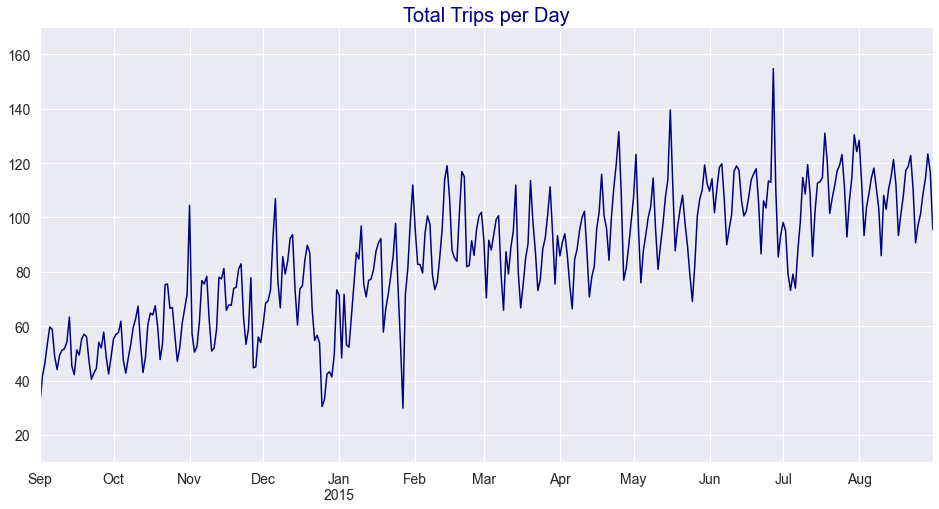

In [89]:
fig=plt.figure()
ax=bydate.plot(figsize=(16,8),fontsize=12,ylim = (10000,170000), color='navy')
formatter= FuncFormatter(thousand_format)
ax.yaxis.set_major_formatter(formatter)
plt.title('Total Trips per Day', fontsize= 20, color='navy')
plt.tick_params(labelsize=14)
plt.xlabel('')

# The effect of time on demand for Uber rides: distribution per hour, weekday, and month.

In [92]:
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


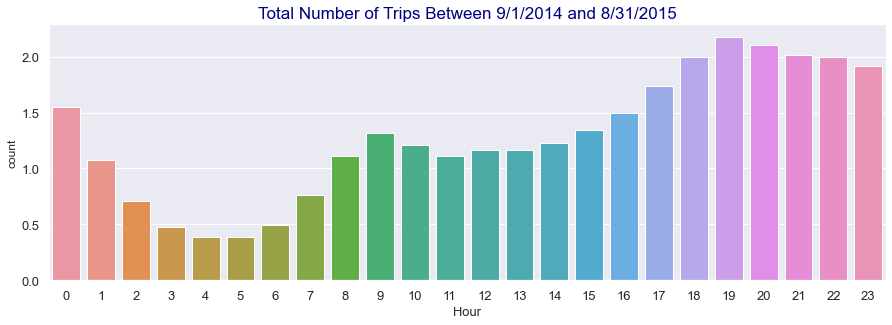

In [105]:
fig= plt.figure(figsize=(15,16))
formatter=FuncFormatter(million_format)

plt.subplot(3,1,1)
ax1= sns.countplot(df_viz.hour,order = range(24))
ax1.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.title('Total Number of Trips Between 9/1/2014 and 8/31/2015', fontsize=17, color='navy')
plt.xlabel('Hour',fontsize=13)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


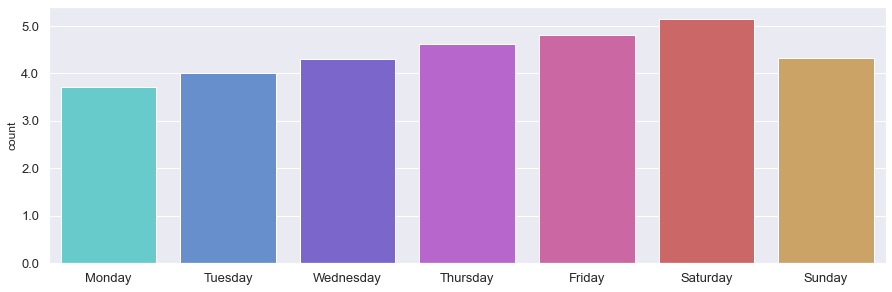

In [106]:
fig= plt.figure(figsize=(15,16))
formatter=FuncFormatter(million_format)
plt.subplot(3,1,2)
ax2=sns.countplot(df_viz.weekday,order=range(7))
ax2.set_xticklabels(weekday_labels)
ax2.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.xlabel('')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


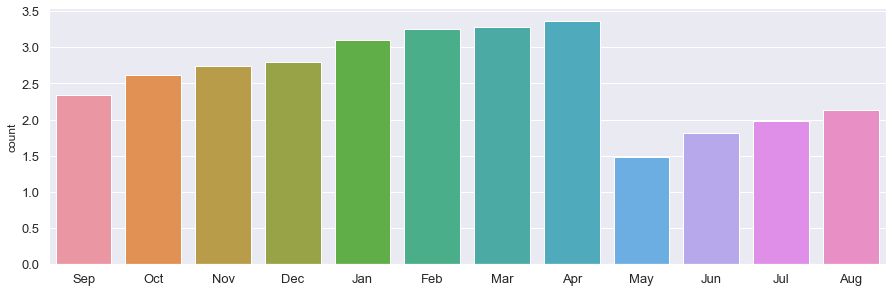

In [107]:
fig= plt.figure(figsize=(15,16))
formatter=FuncFormatter(million_format)
plt.subplot(3,1,3) 
ax3 = sns.countplot(df_viz.month)
ax3.set_xticklabels(month_labels)
ax3.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.xlabel('')
plt.show()

# Estimated Monthly Base Revenue

In [108]:
bydaterev=df_viz.groupby('month')['est_revenue'].sum()

In [110]:
sumrev=bydaterev.sum()
print ('${:,.0f}M'.format(sumrev * 1e-6), "Base Revenue   Uber's Base Gross Margin:", '${:,.0f}'.format(sumrev * .25))

$595M Base Revenue   Uber's Base Gross Margin: $148,757,755


In [111]:
#Estimated base gross margin based on information that average UberX fare in Sep 2014 was $27 (but it has dropped):
len(df_viz) * 27 * .25

208735400.25

In [112]:
bydaterev.head()

month
1   41457151.3925
2   47252851.6517
3   52154385.1658
4   54095066.2220
5   61539912.0576
Name: est_revenue, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


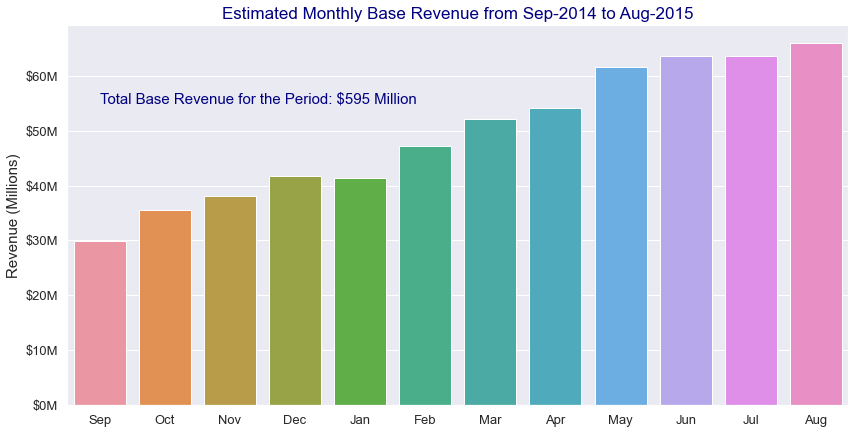

In [121]:
months_seq=[9,10,11,12,1,2,3,4,5,6,7,8]
formatter=FuncFormatter(millions_currency)

plt.figure(figsize=(14,7))
ax=sns.barplot(bydaterev.index,bydaterev.values,order=months_seq)
ax.set_xticklabels(month_labels)
ax.yaxis.set_major_formatter(formatter)

font={'color':'navy','size':15}
plt.text(0, 55000000, 'Total Base Revenue for the Period: ${:,.0f} Million'.format(sumrev * 1e-6),fontdict = font)
plt.xlabel('')
plt.ylabel('Revenue (Millions)',fontsize=15)
plt.tick_params(labelsize=13)
plt.title('Estimated Monthly Base Revenue from Sep-2014 to Aug-2015', fontsize = 17, color='navy')

plt.show()

In [122]:
df_viz.est_revenue.mean()

19.241869694747738

In [124]:
#Rough estimate of revenue share from Uber Pool from 12/1/2014 to 8/31/2015 (total of 25,634,526 trips):
rev=df_viz[(df_viz.pu_date >=datetime.datetime(2014,12,1)) & (df_viz.pu_date <=datetime.datetime(2015,8,31))].est_revenue.mean()
u_pool=rev * 0.75 * 1500000
u_pool

21565512.055648196

In [125]:
u_pool/df_viz[(df_viz.pu_date >= datetime.datetime(2014, 12, 1)) & (df_viz.pu_date <= datetime.datetime(2015, 8, 31))].est_revenue.sum() #Uber Pool represented only about 4% of the total revenue for the period between Dec/14 and Aug/15.

0.04388612451814645

# Month Base Revenue Growth

In [129]:
dict_growth={}
for i in range(len(months_seq)):
    mo=months_seq[i]
    rev=bydaterev[mo]
    if mo==9:
        growth_pct=0
    elif mo==1:
        growth_pct=((rev/bydaterev[12]) - 1) * 100
    else:
        growth_pct=((rev/bydaterev[mo - 1]) - 1) * 100
    print (month_labels[i], 'Revenue =', '${:,.0f}'.format(rev), 'Growth % = ', '{:.1f}'.format(growth_pct))
    dict_growth[month_labels[i]] = growth_pct

Sep Revenue = $29,932,282 Growth % =  0.0
Oct Revenue = $35,531,001 Growth % =  18.7
Nov Revenue = $38,170,687 Growth % =  7.4
Dec Revenue = $41,661,569 Growth % =  9.1
Jan Revenue = $41,457,151 Growth % =  -0.5
Feb Revenue = $47,252,852 Growth % =  14.0
Mar Revenue = $52,154,385 Growth % =  10.4
Apr Revenue = $54,095,066 Growth % =  3.7
May Revenue = $61,539,912 Growth % =  13.8
Jun Revenue = $63,667,666 Growth % =  3.5
Jul Revenue = $63,607,348 Growth % =  -0.1
Aug Revenue = $65,961,099 Growth % =  3.7


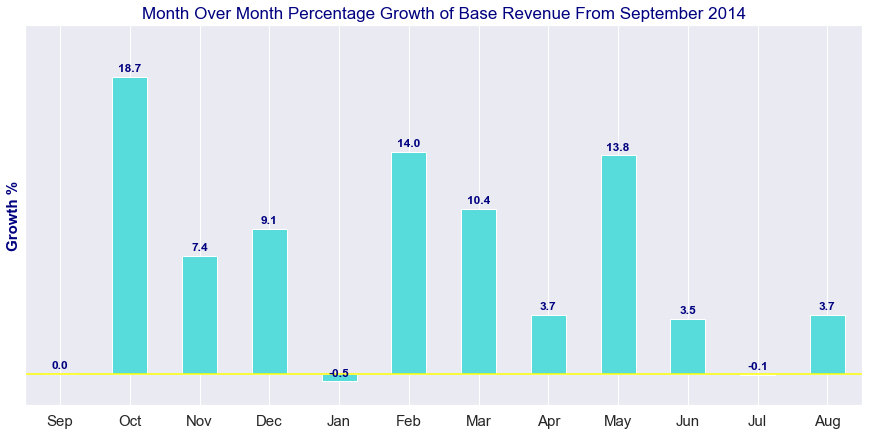

In [136]:
df_plt1=pd.DataFrame(pd.Series(dict_growth),index=month_labels,columns=['growth_pct'])
labels_list=df_plt1.growth_pct.values.round(1)
kwargs={'fontsize':12, 'ha':'center','va':'bottom','weight':'bold','color':'navy'}
ax = df_plt1.plot(kind = 'bar', figsize = (15,7), fontsize = 14, rot = 0, legend=False)
ax.get_yaxis().set_ticks([])
annotate_labels(ax,labels_list,**kwargs)

plt.axhline(0,color='yellow')
plt.title('Month Over Month Percentage Growth of Base Revenue From September 2014',fontsize = 17, color='navy')
plt.ylabel('Growth %',fontsize=15,weight='bold',color='navy')
plt.ylim(-2,22)
plt.tick_params(labelsize=15)
plt.show()

Cummulative % Growth Over Period:


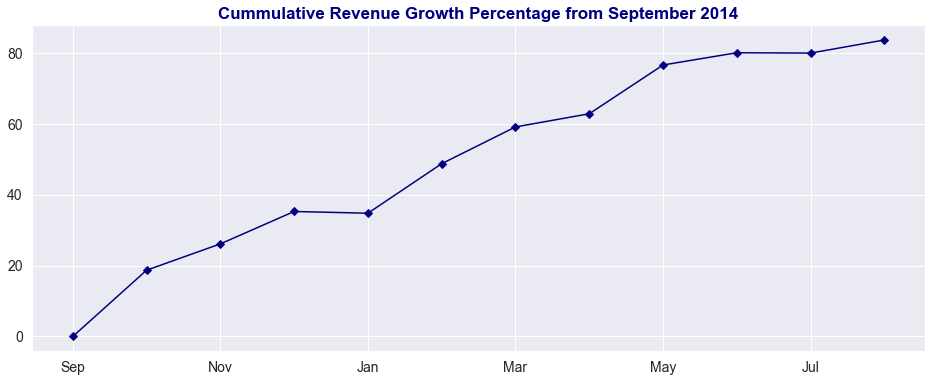

In [137]:
print('Cummulative % Growth Over Period:'),df_plt1.growth_pct.sum()
df_plt1.cumsum().plot(color = 'navy', marker = 'D', legend = False, figsize=(16, 6))
plt.title('Cummulative Revenue Growth Percentage from September 2014', fontsize=17, weight='bold', color='navy')
plt.tick_params(labelsize=14)
plt.show()

# Which day of the week has the worst (slowest) traffic overall?

In [138]:
df_plt2=df_viz.groupby('weekday')['trip_mph_avg'].median()            

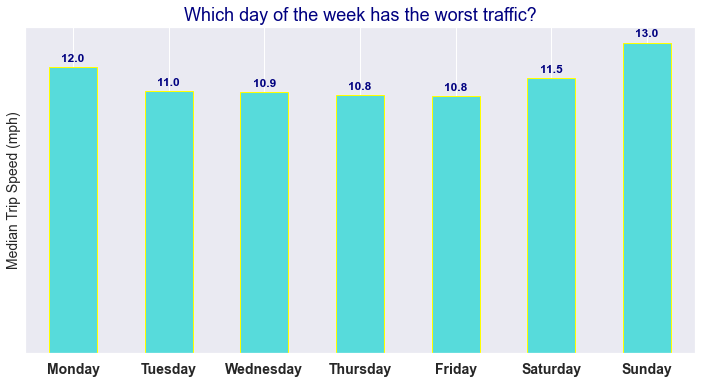

In [140]:
fig=plt.figure()
labels_list=df_plt2.round(1)
kwargs={'fontsize':12,'ha':'center','va':'bottom','weight':'bold','color':'navy'}
ax=df_plt2.plot(kind='bar',rot=0,figsize=(12,6),fontsize=12,edgecolor='yellow',linewidth=1)
ax.set_xticklabels(weekday_labels,weight='bold')

ax.get_yaxis().set_ticks([])
annotate_labels(ax,labels_list, **kwargs)

plt.xlabel('')
plt.ylabel('Median Trip Speed (mph)', fontsize = 14)
plt.tick_params(labelsize=14)
plt.title('Which day of the week has the worst traffic?', fontsize = 18, color='navy')
plt.show()

# What is the median distance traveled per trip?

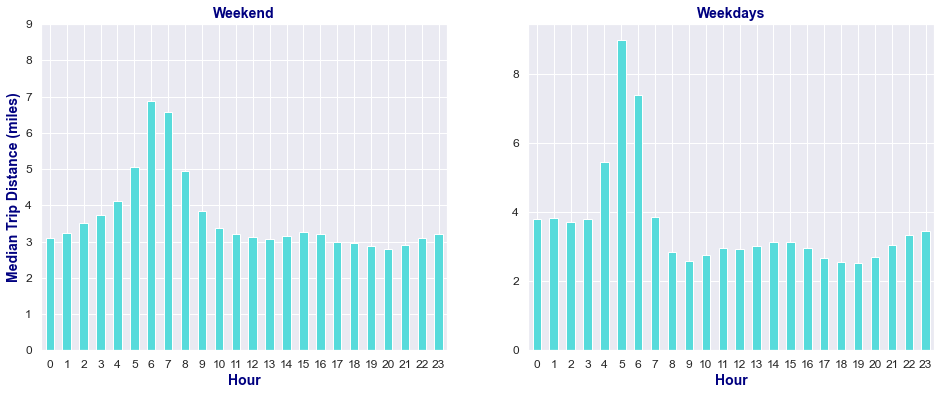

In [141]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
df_viz[(df_viz.weekday >=5)].groupby('hour')['trip_distance'].median().plot(kind='bar', rot=0,fontsize=14)
plt.ylim(0,9)
plt.tick_params(labelsize=12)
plt.ylabel('Median Trip Distance (miles)', fontsize=14, weight='bold', color='navy')
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekend', fontsize=14, weight='bold', color='navy')

plt.subplot(1,2,2)
df_viz[df_viz.weekday < 5].groupby('hour')['trip_distance'].median().plot(kind='bar', rot = 0)
plt.tick_params(labelsize=12)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekdays', fontsize=14, weight='bold', color='navy')

plt.show()

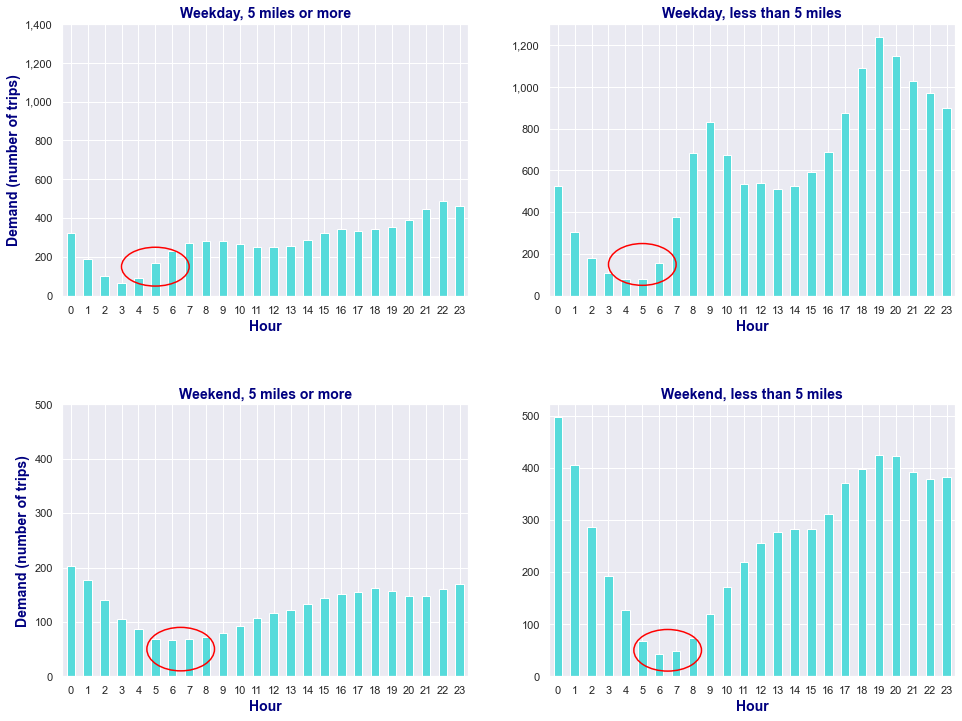

In [142]:
#Create plot similar to the above but with the count of trips per hour, comparing weekday vs weekend and 
#distances >=5 versus < 5 miles. Indeed, the plots show that there is a higher demand for trips that go beyond 

fig=plt.figure(figsize=(16,12))
formatter=FuncFormatter(thousand_format)

plt.subplot(2,2,1)
ax1=df_viz[(df_viz.weekday<5) & (df_viz.trip_distance >=5)].\
groupby('hour')['trip_distance'].count().plot(kind='bar', rot=0)
ax1.yaxis.set_major_formatter(formatter)
ellipse = Ellipse(xy=(5, 150000), width=4, height=200000, edgecolor='red', fc='None', lw=1.5)
ax1.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.ylabel('Demand (number of trips)', fontsize=14, weight='bold', color='navy')
plt.ylim(0, 1400000)
plt.title('Weekday, 5 miles or more', fontsize=14, weight='bold', color='navy')

plt.subplot(2,2,2)
ax2 = df_viz[(df_viz.weekday < 5) & (df_viz.trip_distance < 5)].\
groupby('hour')['trip_distance'].count().plot(kind='bar', rot = 0)
ax2.yaxis.set_major_formatter(formatter)
ellipse = Ellipse(xy=(5, 150000), width=4, height=200000, edgecolor='red', fc='None', lw=1.5)
ax2.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekday, less than 5 miles', fontsize=14, weight='bold', color='navy')

plt.subplot(2,2,3)
ax3 = df_viz[(df_viz.weekday >= 5) & (df_viz.trip_distance >= 5)].\
groupby('hour')['trip_distance'].count().plot(kind='bar', rot = 0)
ax3.yaxis.set_major_formatter(formatter)
ellipse = Ellipse(xy=(6.5, 50000), width=4, height=80000, edgecolor='red', fc='None', lw=1.5)
ax3.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.ylabel('Demand (number of trips)', fontsize=14, weight='bold', color='navy')
plt.ylim(0, 500000)
plt.title('Weekend, 5 miles or more', fontsize=14, weight='bold', color='navy')

plt.subplot(2,2,4)
ax4 = df_viz[(df_viz.weekday >= 5) & (df_viz.trip_distance < 5)].\
groupby('hour')['trip_distance'].count().plot(kind='bar', rot = 0)
ax4.yaxis.set_major_formatter(formatter)
ellipse = Ellipse(xy=(6.5, 50000), width=4, height=80000, edgecolor='red', fc='None', lw=1.5)
ax4.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekend, less than 5 miles', fontsize=14, weight='bold', color='navy')


fig.subplots_adjust(hspace=0.4)
plt.show()

# What are the most popular pickup and drop-off taxi zones?

In [143]:
print (df_viz.origin_taz.value_counts().head(5).sum()/float(len(df_viz)))
print (df_viz.destination_taz.value_counts().head(5).sum()/float(len(df_viz[df_viz.destination_taz.isnull() == False])))

0.43922264570453473
0.41584985632479493


In [144]:
len(df_viz[(df_viz.origin_taz.isin(['2A', '15', '4C', '1', '6B']) == True) & \
           (df_viz.destination_taz.isin(['2A', '15', '4C', '1', '6B']) == True)])

6231353

In [147]:
len(df_viz[(df_viz.origin_taz == '2A') | (df_viz.destination_taz == '2A')])/(1.0*len(df_viz)) #8979830

0.2903860697677705

# Visualizing the most popular pick up and drop off location pairs.

In [149]:
df_plt3=df_viz.pivot_table('id',aggfunc='count', index='origin_taz',columns='destination_taz')

In [151]:
df_plt3.shape

(28, 29)

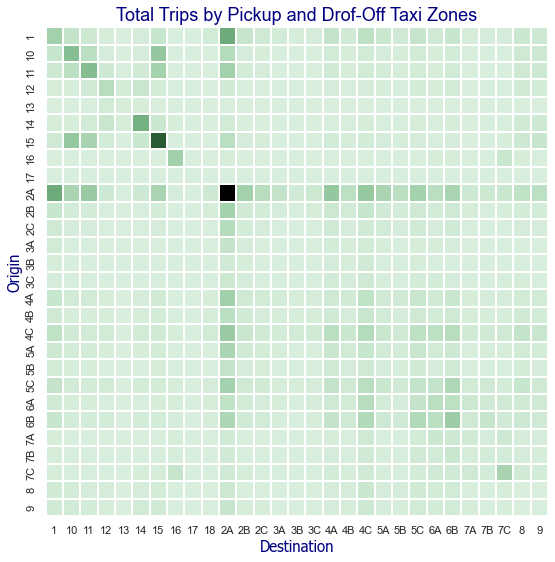

In [152]:
fig = plt.figure(figsize=(9,9))

cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.9, as_cmap=True) #'YlOrRd' #ggplot:'viridis'

sns.heatmap(df_plt3, cmap=cmap, linewidths=0.1, cbar=False)

plt.title('Total Trips by Pickup and Drof-Off Taxi Zones', fontsize=18, color='navy')
plt.xlabel('Destination', fontsize=15, fontname='Tahoma', color='navy')
plt.ylabel('Origin', fontsize=15, fontname='Tahoma', color='navy')
plt.tick_params(labelsize=11)
plt.show()

# mean time and distance to destination from the most popular pick up location

In [155]:
df_plt4=df_viz[df_viz.origin_taz=='2A'].groupby('destination_taz')['trip_distance'].mean().sort_values()
df_plt5=df_viz[df_viz.origin_taz=='2A'].groupby('destination_taz')['duration_min'].mean().sort_values()

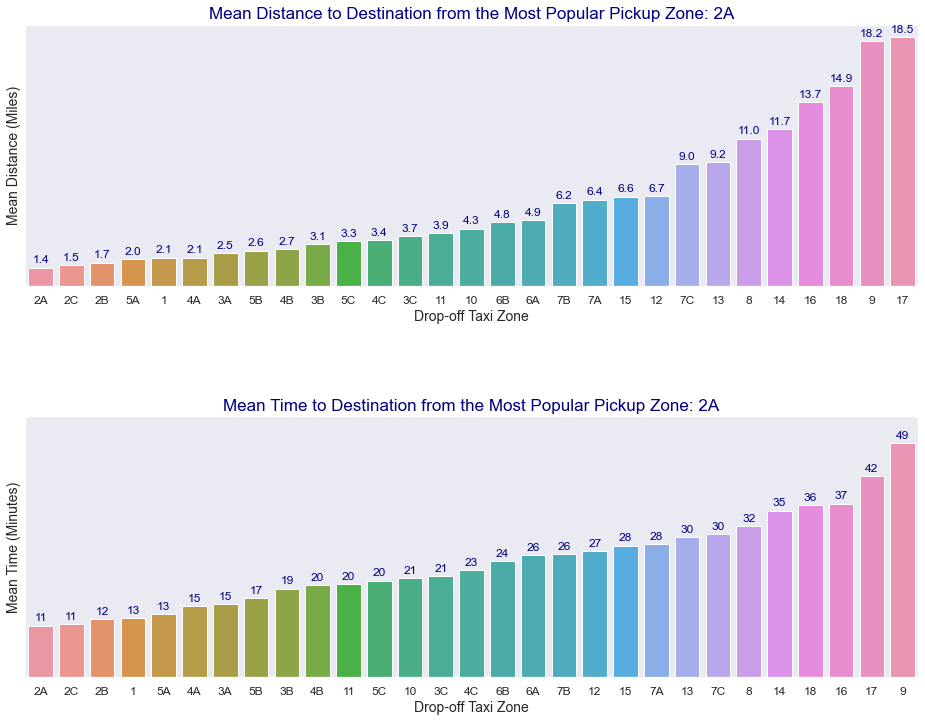

In [156]:
fig = plt.figure(figsize = (16,12))
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'color': 'navy'}


plt.subplot(2,1,1)
ax1 = sns.barplot(x=df_plt4.index, y=df_plt4.values)

#ax1.set_yticks(range(0, 21, 2))
ax1.get_yaxis().set_ticks([])
labels_list = df_plt4.values.round(1)
annotate_labels(ax1, labels_list, **kwargs)
plt.title('Mean Distance to Destination from the Most Popular Pickup Zone: 2A', fontsize=17, color='navy')
plt.ylabel('Mean Distance (Miles)', fontsize = 14)
plt.xlabel('Drop-off Taxi Zone', fontsize=14)
plt.tick_params(labelsize=12)


plt.subplot(2,1,2)
ax2 = sns.barplot(x=df_plt5.index, y=df_plt5.values)

#ax2.set_yticks(range(0, 51, 5))
ax2.get_yaxis().set_ticks([])
labels_list = df_plt5.apply(lambda x: '{:.0f}'.format(round(x))).values
annotate_labels(ax2, labels_list, **kwargs)
plt.title('Mean Time to Destination from the Most Popular Pickup Zone: 2A', fontsize=17, color='navy')
plt.ylabel('Mean Time (Minutes)', fontsize = 14)
plt.ylim(0,55)
plt.xlabel('Drop-off Taxi Zone', fontsize=14)
plt.tick_params(labelsize=12)


fig.subplots_adjust(hspace=.5)
plt.show()

# Visualization of Variable Distributions and Bivariate Relationships.
Distribution of trip distance

In [157]:
df_viz.trip_distance.max(), df_uber.trip_distance.max()

(568.57, 2593.08)

In [158]:
freq, bins_dist=np.histogram(df_viz.trip_distance , bins=10, range=(0,25))
freq, bins_dist

(array([12709212,  8364039,  3566741,  2035261,  1296836,   672674,
          705998,   747728,   299927,   132566], dtype=int64),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]))

In [159]:
for val in freq:
    print(float(val)/sum(freq))

0.4162726243132304
0.273952505032429
0.11682365801401344
0.06666215321865507
0.042476065787861
0.022032504555536406
0.023123985989052038
0.024490794301997885
0.009823693191394893
0.004342015595829836


In [160]:
df_viz.trip_distance.median(), df_uber.trip_distance.median()

(3.09, 3.09)

In [161]:
print(len(df_viz[df_viz.trip_distance <=5])/(1.0*len(df_viz)))
print(len(df_viz[df_viz.trip_distance <=2])/(1.0*len(df_viz)))

0.6821384577290933
0.3192358898883037


In [162]:
df_viz[df_viz.trip_distance >=300].head(10)

,id,origin_taz,destination_taz,trip_distance,pu_date,year,month,day,hour,weekday,duration_min,trip_mph_avg,est_revenue
943214,19594602,10,15,371.5500,2014-09-16,2014,9,16,10,1,474.2833,47.0035,818.7617
3620586,5138875,14,NaN,357.2700,2014-11-04,2014,11,4,23,1,309.5167,69.2570,736.1033
10581718,10072444,16,NaN,330.9000,2015-02-04,2015,2,4,18,2,648.5000,30.6153,808.6000
11224977,17353914,15,15,378.0100,2015-02-25,2015,2,25,15,2,600.7667,37.7528,874.3358
11684172,23119455,14,14,350.1500,2015-02-03,2015,2,3,18,1,559.3500,37.5597,811.0850
13829799,16426984,15,NaN,568.5700,2015-03-27,2015,3,27,19,4,652.3167,52.2970,1225.8583
16530542,15478567,7A,17,315.5700,2015-04-09,2015,4,9,1,3,248.0667,76.3271,641.6208
18643154,6860856,5C,16,308.4200,2015-05-31,2015,5,31,5,6,304.1833,60.8357,648.7492
18854980,9245564,15,15,302.7900,2015-05-10,2015,5,10,22,6,441.6667,41.1337,687.0158
18949729,10208984,4A,7C,335.3000,2015-05-09,2015,5,9,16,5,813.6667,24.7251,874.1083


# Distribution of trip duration (in minutes)

In [163]:
df_viz.duration_min.describe()

count   30923763.0000
mean          20.9923
std           16.0846
min            0.0000
25%           10.8500
50%           17.2333
75%           26.6833
max          959.3000
Name: duration_min, dtype: float64

In [167]:
freq, bins_dur= np.histogram(df_viz.duration_min, bins=10, range=(0,50))
freq, bins_dur

(array([1235100, 5391133, 6311894, 5266617, 3929001, 2777037, 1878313,
        1256118,  852522,  589907], dtype=int64),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]))

# Plot of the histograms for trip distance and duration

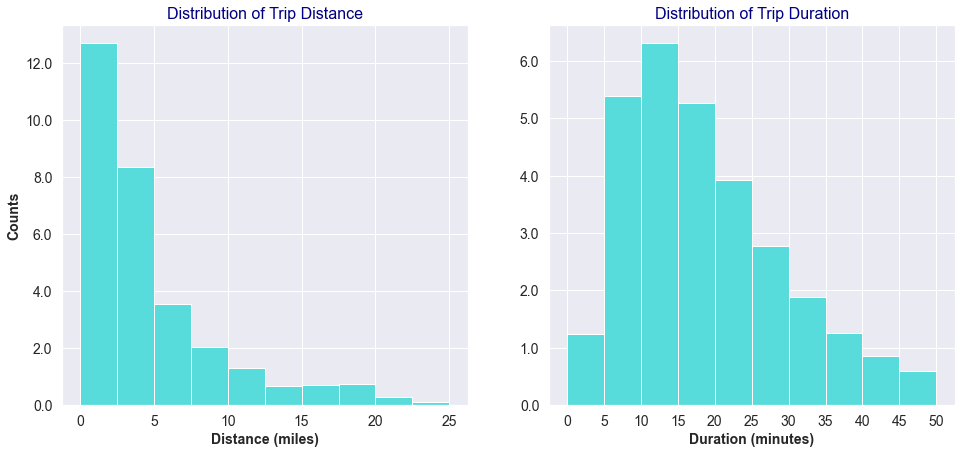

In [173]:
fig = plt.figure(figsize=(16, 7))

formatter = FuncFormatter(million_format)

plt.subplot(1,2,1)
ax1 = df_viz.trip_distance.dropna().hist(bins=bins_dist)
ax1.yaxis.set_major_formatter(formatter)

plt.xlabel('Distance (miles)', fontsize=14, weight='bold')
plt.ylabel('Counts', fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip Distance', color='navy', fontsize=16)


plt.subplot(1,2,2)
ax2 = df_viz.duration_min.hist(bins=bins_dur)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_xticks(bins_dur) #bins are in 5 minutes intervals.

plt.xlabel('Duration (minutes)', fontsize=14, weight='bold')
plt.ylabel('')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip Duration', color='navy', fontsize=16)

plt.show()

# Trip Distance versus Trip Duration

In [174]:
df_plt6=df_viz.groupby(['origin_taz','destination_taz'])['trip_distance','duration_min'].mean()
df_plt6.values

C:\Users\AVU1V9~1\AppData\Local\Temp/ipykernel_8692/1883332545.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_plt6=df_viz.groupby(['origin_taz','destination_taz'])['trip_distance','duration_min'].mean()


array([[ 1.4180704 , 10.56080168],
       [ 3.65081289, 17.97784922],
       [ 5.09364295, 22.49040273],
       ...,
       [19.84848465, 44.5050345 ],
       [12.19842835, 29.74001046],
       [ 2.52056516,  9.87329898]])

In [176]:
df_plt6.shape

(812, 2)

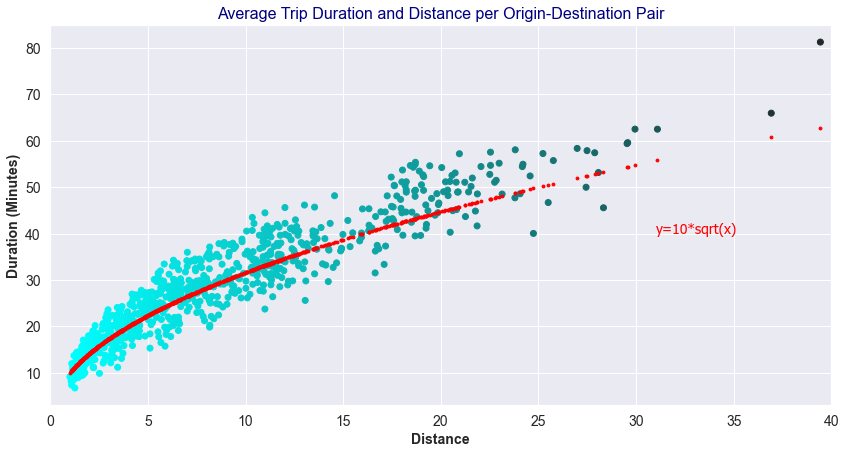

In [189]:
distance=df_plt6.values[:,:1]
duration=df_plt6.values[:,1:]
duration_hat= pd.Series(distance.reshape(812,)).apply(lambda x:10*np.sqrt(x))

plt.figure(figsize=(14,7))
cmap=sns.dark_palette('cyan',3,reverse=True,as_cmap=True)

plt.scatter(distance,duration, c=distance, cmap=cmap)
plt.scatter(distance,duration_hat,color='red',s=8)

font={'color':'red','size':14,'family':'Tahoma'}
plt.text(31,40,'y=10*sqrt(x)',fontdict=font)
plt.xlim(0,40)
plt.xlabel('Distance', fontsize = 14, weight='bold')
plt.ylabel('Duration (Minutes)', fontsize = 14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Average Trip Duration and Distance per Origin-Destination Pair', fontsize = 16, color='navy')
plt.show()

In [191]:
df_plt6[df_plt6.trip_distance > 25] #origin and destination pairs whose distance between them is greater than 25 miles

trip_distance  duration_min
origin_taz destination_taz                             
13         18                     28.0717       53.1685
14         17                     27.8808       57.4252
           18                     29.9431       62.5171
16         17                     31.0922       62.5046
           18                     28.3292       45.5679
17         14                     27.4876       57.8793
           16                     39.4353       81.2769
           7C                     25.2298       57.2576
           9                      25.5005       46.6947
7A         17                     29.5695       59.6055
7C         17                     26.9832       58.3610
8          17                     25.7619       55.7408
           18                     29.5376       59.4060
9          17                     27.4381       49.9894
           18                     36.9205       65.9577

# Distribution of the average speed per trip

In [196]:
df_viz.trip_mph_avg.describe()

count   30898897.0000
mean          13.5071
std           11.7569
min            0.0000
25%            8.4098
50%           11.4488
75%           16.2667
max        22548.0000
Name: trip_mph_avg, dtype: float64

In [197]:
freq, bins=np.histogram(df_viz.trip_mph_avg, bins=10, range=(0,50))
freq, bins

(array([ 1313433, 10564782,  9861693,  4248216,  2152654,  1281911,
          767746,   434298,   196149,    61858], dtype=int64),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]))

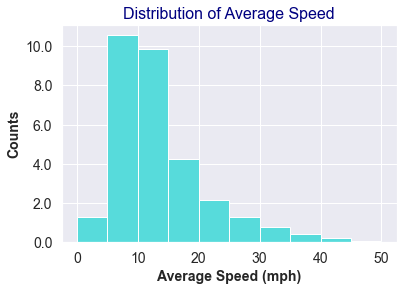

In [202]:
fig, ax = plt.subplots(1,1)

formatter = FuncFormatter(million_format)

ax.hist(df_viz.trip_mph_avg.dropna(), bins)
ax.yaxis.set_major_formatter(formatter)

plt.xlabel('Average Speed (mph)', fontsize=14, weight='bold')
plt.ylabel('Counts', fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Average Speed', color='navy', fontsize=16)
plt.show()

In [204]:
df_plt7=df_viz[df_viz.weekday<5].groupby('hour')['trip_mph_avg'].median()
df_plt7.head()

hour
0   14.3002
1   15.3747
2   16.1274
3   16.6125
4   19.5019
Name: trip_mph_avg, dtype: float64

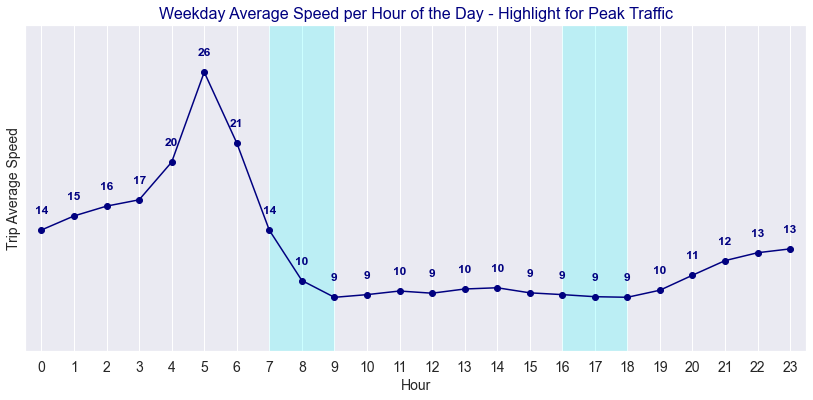

In [209]:
plt.figure(figsize =(14, 6))
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'top', 'color': 'navy', 'weight': 'bold'}


ax = df_plt7.plot(marker = 'o', color = 'navy')

for x, y in zip(df_plt7.index, df_plt7.values):
    ax.annotate('{:.0f}'.format(y), xy=(x, y), xytext= (0, 24), textcoords='offset points', **kwargs)


ax.get_yaxis().set_ticks([]) #hide tick labels on y-axis
plt.fill([7,9,9,7], [0,0,30,30], 'cyan', alpha=0.2)
plt.fill([16,18,18,16], [0,0,30,30], 'cyan', alpha=0.2)
plt.xticks(range(24))
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Trip Average Speed', fontsize=14)
plt.ylim(5, 30)
plt.xlim(-0.5, 23.5)
plt.tick_params(labelsize=14)
plt.title('Weekday Average Speed per Hour of the Day - Highlight for Peak Traffic', fontsize = 16, color='navy')
plt.show()

In [210]:
def is_peak_hour(x):
    return 1 if x[0] in (7,8,9,16,17,18) and x[1] < 5 else 0

In [211]:
df_viz['peak_hour']=pd.Series(map(lambda x:is_peak_hour(x),df_viz.loc[:,['hour','weekday']].values))

In [212]:
df_viz.head()

,id,origin_taz,destination_taz,trip_distance,pu_date,year,month,day,hour,weekday,duration_min,trip_mph_avg,est_revenue,peak_hour
0,252581,7C,6A,4.2500,2014-09-01,2014,9,1,9,0,15.1833,16.7947,15.3017,1.0000
1,252582,7B,15,10.1700,2014-09-01,2014,9,1,18,0,34.0833,17.9032,32.2767,1.0000
2,252583,11,2A,4.0200,2014-09-01,2014,9,1,17,0,17.1000,14.1053,15.5700,1.0000
3,252584,3B,4A,1.4600,2014-09-01,2014,9,1,13,0,6.5333,13.4082,8.0000,0.0000
4,252585,2A,10,8.3100,2014-09-01,2014,9,1,14,0,26.2833,18.9702,26.2917,0.0000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AVU1V9~1\AppData\Local\Temp/ipykernel_8692/1454691650.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(handles, labels=['Peak', 'Off Peak'], loc='best', fontsize=13)


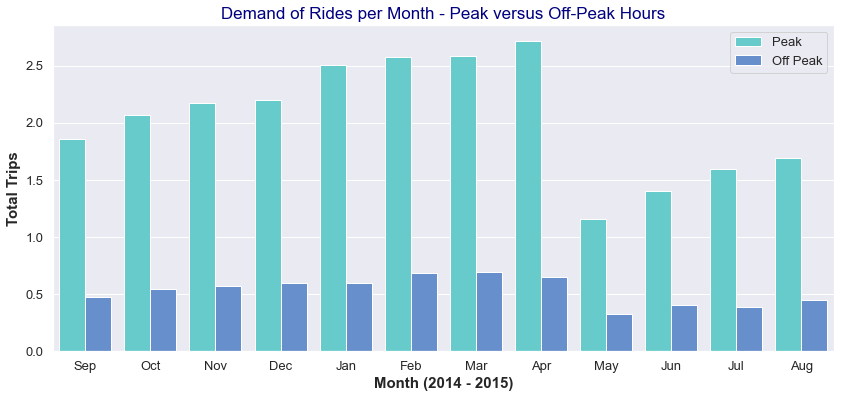

In [215]:
plt.figure(figsize=(14,6))
formatter=FuncFormatter(million_format)

ax=sns.countplot(df_viz['month'],hue=df_viz['peak_hour'])
ax.set_xticklabels(month_labels)
ax.yaxis.set_major_formatter(formatter)

handles, labels = ax.get_legend_handles_labels() #will cause the warning msg that can be ignored 
plt.legend(handles, labels=['Peak', 'Off Peak'], loc='best', fontsize=13)
plt.tick_params(labelsize=13)
plt.xlabel('Month (2014 - 2015)', fontsize = 15, weight='bold')
plt.ylabel('Total Trips', fontsize = 15, weight='bold')
plt.title('Demand of Rides per Month - Peak versus Off-Peak Hours', fontsize = 17, color='navy')
plt.show()

In [218]:
#To show all the dataframes in the environment:
%psearch df* 